# Handling multi-dimensional arrays with xarray

## Authors & Contributors

### Authors

- Pier Lorenzo Marasco, Ispra (Italy), [@pl-marasco](https://github.com/pl-marasco)

### Contributors

- Alejandro Coca-Castro, The Alan Turing Institute (United Kingdom), [@acocac](https://github.com/acocac)

<div class="alert alert-info">
    <i class="fa-question-circle fa" style="font-size: 22px;color:#666;"></i> <b>Overview</b>
    <br>
    <br>
    <b>Questions</b>
    <ul>
        <li>What is Xarray?</li>
        <li>How to open a local file?</li>
        <li>How to print metadata information?</li>
        <li>How to make a selection?</li>
        <li>How to visualize with matplotlib?</li>
        <li>How to mask data?</li>
    </ul>
    <b>Objectives</b>
    <ul>
        <li>Learn about Xarray Python ecosystem</li>
        <li>Learn file handling with xarray</li>
        <li>Learn to get metadata information</li>
        <li>Learn to select and mask data?</li>
        <li>Learnn to visualize data</li>
    </ul>
</div>

## Context


We will be using [Pangeo](https://pangeo.io/) open-source software stack for computing and visualizing the Vegetation Condition Index (VCI) ([1] Kogan, 1995), a well-established indicator to estimate droughts from remote sensing data.

VCI compares the current normalized difference vegetation index (NDVI) \[2] to the range of values observed in previous years.

### Data

This episode we will use Sentinel-3 NDVI Analysis Ready Data (ARD) and Long Term Statistics (1999-2019) product provided by the Copernicus Global Land Service \[3].

Datasets can be discovered through the OpenEO API\[5] from the CGLS distributor VITO \[4].  Access is free of charge but an [EGI registration](https://aai.egi.eu/) is needed. 

Both datasets used in this episode can also be downloaded from [Zenodo](https://zenodo.org/): [FOSS4G Training Datasets](https://zenodo.org/record/6967373/files/C_GLS_NDVI_20220101_20220701_Lombardia_S3_2.nc)

Further info about drought indexes can be found in the Integrated Drought Management Programme \[5]

\[1] [Application of vegetation index and brightness temperature for drought detection](https://www.sciencedirect.com/science/article/abs/pii/027311779500079T)
\[2] [NDVI](https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index)
\[3] [Copernicus Global Land Service](https://land.copernicus.eu/global/index.html)
\[4] [Vito](https://vito.be/en)
\[5] [OpenEO](https://openeo.org/)
\[5] [Integrated Drought Management](https://www.droughtmanagement.info/indices)

## Setup

This episode uses the following Python packages:

- xarray
- netcdf4
- h5netcdf
- wget
- numpy

Please install these packages if not already available in your Python environment. Below, we only install packages that are not available in the EGI-ACE EOSC deployment of Pangeo for the FOSS4G course.

### Packages

In this episode, Python packages are imported when we start to use them. However, for best software practices, we recommend you to install and import all the necessary libraries at the top of your Jupyter notebook.

In [1]:
import xarray as xr

### Fetch Data

- For now we will upload a netCDF file containing Sentinel-3 NDVI Analysis Ready Data (ARD).
- Later in this episode, we will learn about different ways to access data, including access to remote data.

In [3]:
import wget

In [4]:
site_url = 'https://zenodo.org/record/6967373/files/C_GLS_NDVI_20220101_20220701_Lombardia_S3_2.nc'

try:
    file_name = wget.download(site_url)
    print(file_name)
except:
    print("An error occured")


An error occured


## Open and read metadata through Xarray

In [5]:
cgls_ds = xr.open_dataset('C_GLS_NDVI_20220101_20220701_Lombardia_S3_2.nc')

As the dataset is in NetCDF format Xarray automatically selects the correct engine (this underneath has been
conducted through the automatic specification of engine='netcdf'). If the dataset is in geoTiff format the engine would be 'rasterio'.
Supposing that you have a dataset in an unrecognised format you can always create your own engine and pass it through the engine parameter.

:::{tip}
If you get an error with the previous command, first check the location of the input file CAMS-PM2_5-20211222.netcdf: it needs to be in the same directory as your Jupyter Notebook.
:::

In [6]:
cgls_ds

<xarray.Dataset>
Dimensions:  (t: 20, x: 984, y: 657)
Coordinates:
  * t        (t) datetime64[ns] 2022-01-01 2022-01-11 ... 2022-07-01 2022-07-11
  * x        (x) float64 8.502 8.505 8.508 8.511 ... 11.42 11.42 11.42 11.43
  * y        (y) float64 46.63 46.63 46.63 46.62 ... 44.69 44.69 44.68 44.68
Data variables:
    crs      |S1 ...
    NDVI     (t, y, x) uint8 ...
Attributes:
    Conventions:  CF-1.8
    institution:  openEO platform

## What is xarray?

Xarray introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like multidimensional arrays, which allows for a more intuitive, more concise, and less error-prone developer experience.

### How is xarray structured?

Xarray has two core data structures, which build upon and extend the core strengths of NumPy and pandas. Both data structures are fundamentally N-dimensional:

- [DataArray](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.html#xarray.DataArray) is our implementation of a labeled, N-dimensional array. It is an N-D generalization of a pandas.Series. The name DataArray itself is borrowed from Fernando Perez’s datarray project, which prototyped a similar data structure.

- [Dataset](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.html#xarray.Dataset) is a multi-dimensional, in-memory array database. It is a dict-like container of DataArray objects aligned along any number of shared dimensions, and serves a similar purpose in xarray to the pandas.DataFrame.


## Accessing Coordinates and Data Variables 

DataArray, within Datasets, can be accessed through:
- the dot notation like Dataset.NameofVariable  
- or using square bracket like Dataset['NameofVariable'] (NameofVariable needs to be a string so use quotes or double quotes)

In [7]:
cgls_ds.t

<xarray.DataArray 't' (t: 20)>
array(['2022-01-01T00:00:00.000000000', '2022-01-11T00:00:00.000000000',
       '2022-01-21T00:00:00.000000000', '2022-02-01T00:00:00.000000000',
       '2022-02-11T00:00:00.000000000', '2022-02-21T00:00:00.000000000',
       '2022-03-01T00:00:00.000000000', '2022-03-11T00:00:00.000000000',
       '2022-03-21T00:00:00.000000000', '2022-04-01T00:00:00.000000000',
       '2022-04-11T00:00:00.000000000', '2022-04-21T00:00:00.000000000',
       '2022-05-01T00:00:00.000000000', '2022-05-11T00:00:00.000000000',
       '2022-05-21T00:00:00.000000000', '2022-06-01T00:00:00.000000000',
       '2022-06-11T00:00:00.000000000', '2022-06-21T00:00:00.000000000',
       '2022-07-01T00:00:00.000000000', '2022-07-11T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * t        (t) datetime64[ns] 2022-01-01 2022-01-11 ... 2022-07-01 2022-07-11
Attributes:
    standard_name:  t
    long_name:      t
    axis:           T

`cgls_ds.t` is a `xarray.DataArray` with dates of type `datetime64[ns]`

In [8]:
cgls_ds.NDVI

<xarray.DataArray 'NDVI' (t: 20, y: 657, x: 984)>
[12929760 values with dtype=uint8]
Coordinates:
  * t        (t) datetime64[ns] 2022-01-01 2022-01-11 ... 2022-07-01 2022-07-11
  * x        (x) float64 8.502 8.505 8.508 8.511 ... 11.42 11.42 11.42 11.43
  * y        (y) float64 46.63 46.63 46.63 46.62 ... 44.69 44.69 44.68 44.68
Attributes:
    long_name:     NDVI
    units:         
    grid_mapping:  crs

In [9]:
cgls_ds['NDVI']

<xarray.DataArray 'NDVI' (t: 20, y: 657, x: 984)>
[12929760 values with dtype=uint8]
Coordinates:
  * t        (t) datetime64[ns] 2022-01-01 2022-01-11 ... 2022-07-01 2022-07-11
  * x        (x) float64 8.502 8.505 8.508 8.511 ... 11.42 11.42 11.42 11.43
  * y        (y) float64 46.63 46.63 46.63 46.62 ... 44.69 44.69 44.68 44.68
Attributes:
    long_name:     NDVI
    units:         
    grid_mapping:  crs

Same can be achieved for attributes and a DataArray.attrs will return a dictionary.

In [10]:
cgls_ds['NDVI'].attrs

{'long_name': 'NDVI', 'units': '', 'grid_mapping': 'crs'}

### Xarray and Memory usage
Memory must be always taken into account. Each DataArray has an impact on it and to avoid issues like kill the kernel users must avoid to open data bigger than memory.
If the dataset isn't fitting the available memory then the best option would be to load it through the help of Dask in a lazy approach. Later on we will introduce the concept.
As the size of the data isn't too big we can continue without any problem.

In [11]:
import numpy as np

In [12]:
print(f'{np.round(cgls_ds.NDVI.nbytes / 1024**2, 2)} MB') # all the data are automatically loaded into memory

12.33 MB


## Renaming Corrdinates and Data Variables 

As later on other datasets has dimension named according to the more common triad lat,lon,time a renomination is needed.

In [13]:
cgls_ds.rename(x='lon', y='lat', t='time')

<xarray.Dataset>
Dimensions:  (time: 20, lon: 984, lat: 657)
Coordinates:
  * time     (time) datetime64[ns] 2022-01-01 2022-01-11 ... 2022-07-11
  * lon      (lon) float64 8.502 8.505 8.508 8.511 ... 11.42 11.42 11.42 11.43
  * lat      (lat) float64 46.63 46.63 46.63 46.62 ... 44.69 44.69 44.68 44.68
Data variables:
    crs      |S1 b''
    NDVI     (time, lat, lon) uint8 ...
Attributes:
    Conventions:  CF-1.8
    institution:  openEO platform

In [14]:
cgls_ds = cgls_ds.rename(x='lon', y='lat', t='time')

In [15]:
cgls_ds

<xarray.Dataset>
Dimensions:  (time: 20, lon: 984, lat: 657)
Coordinates:
  * time     (time) datetime64[ns] 2022-01-01 2022-01-11 ... 2022-07-11
  * lon      (lon) float64 8.502 8.505 8.508 8.511 ... 11.42 11.42 11.42 11.43
  * lat      (lat) float64 46.63 46.63 46.63 46.62 ... 44.69 44.69 44.68 44.68
Data variables:
    crs      |S1 b''
    NDVI     (time, lat, lon) uint8 ...
Attributes:
    Conventions:  CF-1.8
    institution:  openEO platform

## Selection methods

As underneath DataArrays are Numpy Array (that implements the standard Python x[obj] (x: array, obj: int,slice ) syntax) data can be retreated through the same approach of numpy indexing.

In [16]:
cgls_ds.NDVI[0,100,100]

<xarray.DataArray 'NDVI' ()>
array(87, dtype=uint8)
Coordinates:
    time     datetime64[ns] 2022-01-01
    lon      float64 8.799
    lat      float64 46.34
Attributes:
    long_name:     NDVI
    units:         
    grid_mapping:  crs

or slicing

In [17]:
cgls_ds.NDVI[0:5,100:110,100:110]

<xarray.DataArray 'NDVI' (time: 5, lat: 10, lon: 10)>
array([[[ 87,   0, ..., 255,  76],
        [114,   0, ...,  47,  45],
        ...,
        [ 81,  82, ..., 255, 255],
        [ 98,  96, ..., 255, 255]],

       [[118, 116, ...,  38,  60],
        [132,   0, ...,  23,  25],
        ...,
        [115, 121, ..., 255, 255],
        [105, 120, ..., 255, 255]],

       ...,

       [[103,  95, ...,   4, 255],
        [133,  70, ...,  20,   6],
        ...,
        [  0,  17, ...,  88,  79],
        [129, 129, ..., 255,  39]],

       [[ 37,  38, ..., 255, 255],
        [116,  33, ...,  17,   7],
        ...,
        [255, 172, ...,  95,  72],
        [255,   0, ..., 255,  60]]], dtype=uint8)
Coordinates:
  * time     (time) datetime64[ns] 2022-01-01 2022-01-11 ... 2022-02-11
  * lon      (lon) float64 8.799 8.802 8.805 8.808 ... 8.817 8.82 8.823 8.826
  * lat      (lat) float64 46.34 46.33 46.33 46.33 ... 46.32 46.32 46.31 46.31
Attributes:
    long_name:     NDVI
    units:         
    grid_mapping:  crs

As isn't really easy to remember the order of dimensions Xarray can really help making possible to select the position using names

- `.isel` -> selection based on positional index
- `.sel`  -> selection based on coordinate values

We first check the number of element of each coordinate of the NDVI Data Variable using the `len` Python built-in function.

In [18]:
len(cgls_ds.time), len(cgls_ds.lat), len(cgls_ds.lon)

(20, 657, 984)

In [19]:
cgls_ds.NDVI.isel(time=0, lat=100, lon=100) # same as cgls_ds.NDVI[:,-1,0]

<xarray.DataArray 'NDVI' ()>
array(87, dtype=uint8)
Coordinates:
    time     datetime64[ns] 2022-01-01
    lon      float64 8.799
    lat      float64 46.34
Attributes:
    long_name:     NDVI
    units:         
    grid_mapping:  crs

The more common way to select a point is through the labeled coordinate using the `.sel` method.

In [20]:
cgls_ds.NDVI.sel(time='2022-01-01')

<xarray.DataArray 'NDVI' (lat: 657, lon: 984)>
[646488 values with dtype=uint8]
Coordinates:
    time     datetime64[ns] 2022-01-01
  * lon      (lon) float64 8.502 8.505 8.508 8.511 ... 11.42 11.42 11.42 11.43
  * lat      (lat) float64 46.63 46.63 46.63 46.62 ... 44.69 44.69 44.68 44.68
Attributes:
    long_name:     NDVI
    units:         
    grid_mapping:  crs

Time is easy to be used as there is a 1 to 1 correspondence with value in the indexed, float values are not that easy to be use and a small difference makes a big difference in results.


Coordinates are always affected by precision issue so the best option would be to use the sampling method that will search for the closest point according to the method requested.

Option for the method are:
- pad / ffill: propagate last valid index value forward
- backfill / bfill: propagate next valid index value backward
- nearest: use nearest valid index value

Another important parameter that can be set is the tolerance that specify the distance between original and the target. (abs(index\[indexer] - target) <= tolerance) from [documentation](https://xarray.pydata.org/en/v0.17.0/generated/xarray.DataArray.sel.html#:~:text=xarray.DataArray.sel%20%C2%B6%20DataArray.sel%28indexers%3DNone%2C%20method%3DNone%2C%20tolerance%3DNone%2C%20drop%3DFalse%2C%20%2A%2Aindexers_kwargs%29%20%C2%B6,this%20method%20should%20use%20labels%20instead%20of%20integers.)

In [21]:
cgls_ds.sel(lat=46.3, lon=8.8, method='nearest')

<xarray.Dataset>
Dimensions:  (time: 20)
Coordinates:
  * time     (time) datetime64[ns] 2022-01-01 2022-01-11 ... 2022-07-11
    lon      float64 8.799
    lat      float64 46.3
Data variables:
    crs      |S1 b''
    NDVI     (time) uint8 ...
Attributes:
    Conventions:  CF-1.8
    institution:  openEO platform

:::{warning}
To select a single real value without specifying a method, you would need to specify the exact encoded value; not the one you see when printed.
:::

In [22]:
cgls_ds.isel(lon=100).lon.values.item()

8.799356142858498

In [23]:
cgls_ds.isel(lat=100).lat.values.item()

46.336112857142965

In [24]:
cgls_ds.sel(lat=46.336112857142965, lon=8.799356142858498)

<xarray.Dataset>
Dimensions:  (time: 20)
Coordinates:
  * time     (time) datetime64[ns] 2022-01-01 2022-01-11 ... 2022-07-11
    lon      float64 8.799
    lat      float64 46.34
Data variables:
    crs      |S1 b''
    NDVI     (time) uint8 ...
Attributes:
    Conventions:  CF-1.8
    institution:  openEO platform

That is why we use a `method`! It makes your life easier to deal with inexact matches.

As the exercise is more focus to an Area Of Interest this can be obtained through a bounding box defined with slices.

In [25]:
NDVI_AOI = cgls_ds.NDVI.sel(lat=slice(46.5,44.5), lon=slice(8.5,11.5))
NDVI_AOI

<xarray.DataArray 'NDVI' (time: 20, lat: 612, lon: 984)>
[12044160 values with dtype=uint8]
Coordinates:
  * time     (time) datetime64[ns] 2022-01-01 2022-01-11 ... 2022-07-11
  * lon      (lon) float64 8.502 8.505 8.508 8.511 ... 11.42 11.42 11.42 11.43
  * lat      (lat) float64 46.5 46.5 46.49 46.49 ... 44.69 44.69 44.68 44.68
Attributes:
    long_name:     NDVI
    units:         
    grid_mapping:  crs

:::{tip}
Have you noticed that latitudes are selected from the largest to the smallest values e.g. `46.5`, `44.5` while longitudes are selected from the smallest to the largest value e.g. `8.5`,`11.5`.
**The reason is that you need to use the same order than the corresponding DataArray**.
:::

## Plotting
Plotting data can be easily obtained through matplotlib.pyplot back-end [matplotlib documentation](https://matplotlib.org/stable/index.html)

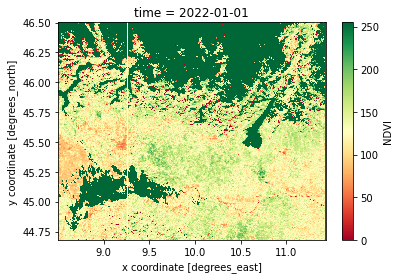

In [26]:
NDVI_AOI.isel(time=0).plot(cmap="RdYlGn")

In the next episode we will learn more about visualization and how to make interactive plots using [holoviews](https://holoviews.org/).

NDVI values are a little odd in comparison with standard NDVI range values \[-1, +1]. This finds confirmation on the max values reported in the [Product User Manual](https://land.copernicus.eu/global/sites/cgls.vito.be/files/products/CGLOPS1_PUM_NDVI300m-V2_I1.20.pdf) (PUM)

## NDVI characteristics from the Product User Manual (PUM)

| layer name  | description                             | physical min | physical max | digital max | scaling | offset | No Data  |
|-------------|-----------------------------------------|--------------|--------------|-------------|---------|--------|----------|
| ndvi        | normalized difference vegetation index  | -0.08        | 0.92         | 250         | 1/250   | -0.08  | 254, 255 |
| ndvi_unc    | uncertainty on ndvi                     | 0            | 1            | 1000        | 1/1000  | 0      | 65535    |
| nobs        | number of observations                  | 0	           | 32           | 32          | 1       | 0      | 255      |
| qflag       | bitwise quality flag                    | -            | -            | 254         | 1       | 0      | 255      |


from : [Copernicus Global Land Service NDVI 300 V2.0.1](https://land.copernicus.eu/global/sites/cgls.vito.be/files/products/CGLOPS1_PUM_NDVI300m-V2_I1.20.pdf)

## Basic Computations

- Arithmetics
- Reductions

Simple arithmetic can be obtained without worrying about dimensions and coordinates, using the same notation we use when using `numpy`.

In [27]:
NDVI_AOI = NDVI_AOI* (1/250) - 0.08

In [28]:
NDVI_AOI

<xarray.DataArray 'NDVI' (time: 20, lat: 612, lon: 984)>
array([[[0.94 , 0.94 , 0.94 , ..., 0.94 , 0.94 , 0.94 ],
        [0.94 , 0.94 , 0.94 , ..., 0.94 , 0.94 , 0.94 ],
        [0.94 , 0.94 , 0.94 , ..., 0.94 , 0.94 , 0.94 ],
        ...,
        [0.252, 0.32 , 0.316, ..., 0.416, 0.352, 0.94 ],
        [0.404, 0.4  , 0.368, ..., 0.416, 0.412, 0.94 ],
        [0.372, 0.292, 0.292, ..., 0.244, 0.4  , 0.94 ]],

       [[0.94 , 0.94 , 0.94 , ..., 0.94 , 0.508, 0.94 ],
        [0.94 , 0.94 , 0.94 , ..., 0.488, 0.48 , 0.94 ],
        [0.94 , 0.94 , 0.94 , ..., 0.444, 0.508, 0.94 ],
        ...,
        [0.472, 0.432, 0.416, ..., 0.484, 0.464, 0.94 ],
        [0.448, 0.412, 0.392, ..., 0.56 , 0.528, 0.94 ],
        [0.444, 0.424, 0.4  , ..., 0.484, 0.496, 0.94 ]],

       [[0.94 , 0.94 , 0.94 , ..., 0.496, 0.504, 0.94 ],
        [0.94 , 0.94 , 0.94 , ..., 0.5  , 0.496, 0.94 ],
        [0.94 , 0.94 , 0.94 , ..., 0.552, 0.52 , 0.94 ],
        ...,
...
        ...,
        [0.484, 0.484, 0.54 , ..., 0.424, 0.484, 0.94 ],
        [0.452, 0.424, 0.484, ..., 0.488, 0.52 , 0.94 ],
        [0.432, 0.408, 0.392, ..., 0.72 , 0.64 , 0.94 ]],

       [[0.768, 0.74 , 0.708, ..., 0.752, 0.768, 0.94 ],
        [0.7  , 0.724, 0.724, ..., 0.716, 0.748, 0.94 ],
        [0.776, 0.784, 0.788, ..., 0.728, 0.716, 0.94 ],
        ...,
        [0.54 , 0.56 , 0.604, ..., 0.268, 0.296, 0.94 ],
        [0.488, 0.52 , 0.536, ..., 0.448, 0.516, 0.94 ],
        [0.464, 0.48 , 0.532, ..., 0.564, 0.432, 0.94 ]],

       [[0.82 , 0.82 , 0.804, ..., 0.756, 0.756, 0.94 ],
        [0.712, 0.72 , 0.72 , ..., 0.764, 0.752, 0.94 ],
        [0.812, 0.848, 0.848, ..., 0.76 , 0.756, 0.94 ],
        ...,
        [0.58 , 0.568, 0.568, ..., 0.392, 0.4  , 0.94 ],
        [0.584, 0.532, 0.528, ..., 0.548, 0.548, 0.94 ],
        [0.556, 0.484, 0.488, ..., 0.62 , 0.584, 0.94 ]]])
Coordinates:
  * time     (time) datetime64[ns] 2022-01-01 2022-01-11 ... 2022-07-11
  * lon      (lon) float64 8.502 8.505 8.508 8.511 ... 11.42 11.42 11.42 11.43
  * lat      (lat) float64 46.5 46.5 46.49 46.49 ... 44.69 44.69 44.68 44.68

## Statistics

All the standard statistic operations can be used such as `min`, `max`, `mean`. When no argument is passed to the function, the operation is done over all the dimension of the variable (same as for `numpy`).

In [29]:
NDVI_AOI.min()

<xarray.DataArray 'NDVI' ()>
array(-0.08)

You can make a statistical operation over a dimension, for instance here to get the maximum value for each available time.

In [30]:
NDVI_AOI.max(dim='time')

<xarray.DataArray 'NDVI' (lat: 612, lon: 984)>
array([[0.94 , 0.94 , 0.94 , ..., 0.94 , 0.94 , 0.94 ],
       [0.94 , 0.94 , 0.94 , ..., 0.94 , 0.94 , 0.94 ],
       [0.94 , 0.94 , 0.94 , ..., 0.94 , 0.94 , 0.94 ],
       ...,
       [0.596, 0.584, 0.604, ..., 0.728, 0.804, 0.94 ],
       [0.584, 0.604, 0.588, ..., 0.708, 0.68 , 0.94 ],
       [0.556, 0.528, 0.532, ..., 0.72 , 0.64 , 0.94 ]])
Coordinates:
  * lon      (lon) float64 8.502 8.505 8.508 8.511 ... 11.42 11.42 11.42 11.43
  * lat      (lat) float64 46.5 46.5 46.49 46.49 ... 44.69 44.69 44.68 44.68

## Aggregation

We have data every 10 days. To obtain monthly values, we can group values per month.

In [31]:
NDVI_monthly = NDVI_AOI.groupby(NDVI_AOI.time.dt.month).mean()

In [32]:
NDVI_monthly

<xarray.DataArray 'NDVI' (month: 7, lat: 612, lon: 984)>
array([[[0.94      , 0.94      , 0.94      , ..., 0.792     ,
         0.65066667, 0.94      ],
        [0.94      , 0.94      , 0.94      , ..., 0.64266667,
         0.63866667, 0.94      ],
        [0.94      , 0.94      , 0.94      , ..., 0.64533333,
         0.656     , 0.94      ],
        ...,
        [0.38666667, 0.39333333, 0.38666667, ..., 0.44133333,
         0.41866667, 0.94      ],
        [0.42533333, 0.40266667, 0.388     , ..., 0.47466667,
         0.464     , 0.94      ],
        [0.41066667, 0.388     , 0.372     , ..., 0.38666667,
         0.42533333, 0.94      ]],

       [[0.94      , 0.94      , 0.94      , ..., 0.46133333,
         0.468     , 0.94      ],
        [0.94      , 0.94      , 0.94      , ..., 0.44      ,
         0.41466667, 0.94      ],
        [0.94      , 0.94      , 0.94      , ..., 0.41466667,
         0.44933333, 0.94      ],
...
        [0.51866667, 0.52933333, 0.56133333, ..., 0.49066667,
         0.52666667, 0.94      ],
        [0.47733333, 0.49466667, 0.53733333, ..., 0.55333333,
         0.58533333, 0.94      ],
        [0.46266667, 0.41866667, 0.45733333, ..., 0.63333333,
         0.564     , 0.94      ]],

       [[0.794     , 0.78      , 0.756     , ..., 0.754     ,
         0.762     , 0.94      ],
        [0.706     , 0.722     , 0.722     , ..., 0.74      ,
         0.75      , 0.94      ],
        [0.794     , 0.816     , 0.818     , ..., 0.744     ,
         0.736     , 0.94      ],
        ...,
        [0.56      , 0.564     , 0.586     , ..., 0.33      ,
         0.348     , 0.94      ],
        [0.536     , 0.526     , 0.532     , ..., 0.498     ,
         0.532     , 0.94      ],
        [0.51      , 0.482     , 0.51      , ..., 0.592     ,
         0.508     , 0.94      ]]])
Coordinates:
  * lon      (lon) float64 8.502 8.505 8.508 8.511 ... 11.42 11.42 11.42 11.43
  * lat      (lat) float64 46.5 46.5 46.49 46.49 ... 44.69 44.69 44.68 44.68
  * month    (month) int64 1 2 3 4 5 6 7

As we have data from January to July, the time dimension is now `month` and takes values from `1` to `7`.

In [33]:
NDVI_monthly.month

<xarray.DataArray 'month' (month: 7)>
array([1, 2, 3, 4, 5, 6, 7])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7

## Mask

Not all values are valid and masking all the ones not in the valid range \[-0.08, 0.92] is necessary. Masking can be achieved through the method DataSet|Array.where(cond, other) or xr.where(cond, x, y)
The difference consist in the possibility to specify the value in case the condition is positive or not; .where doesn't give this possibility.

In [34]:
NDVI_masked = NDVI_AOI.where((NDVI_AOI >= -0.08) & (NDVI_AOI <= 0.92)) # by default where condition is false values are set to NA

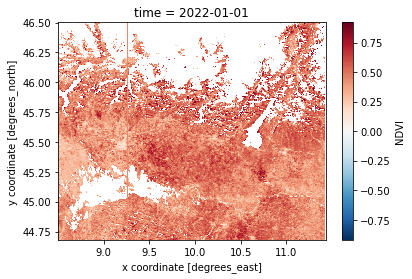

In [35]:
NDVI_masked.isel(time=0).plot()

To better visualize the mask with the help of xr.where a specific variable can be constructed. We will only have two values 0 or 1.

In [36]:
mask = xr.where((NDVI_AOI <= -0.08) | (NDVI_AOI >= 0.92), 1, 0)

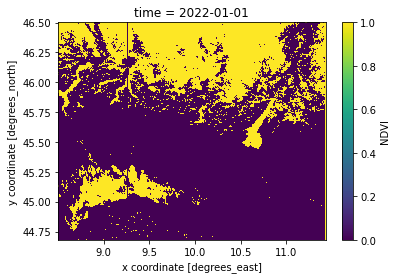

In [37]:
mask.isel(time=0).plot()

Plot a single point over the time dimension

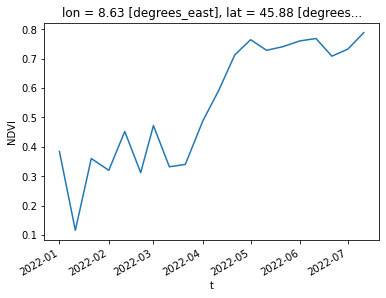

In [40]:
NDVI_masked.sel(lat=45.88, lon=8.63, method='nearest').plot()

<div class="alert alert-success">
    <i class="fa-check-circle fa" style="font-size: 22px;color:#666;"></i> <b>Key Points</b>
    <br>
    <ul>
        <li>Xarray Dataset and DataArray</li>
        <li>Read and get metadata from local raster file</li>
        <li>Dataset and DataArray selection</li>
        <li>Aggregation and statistics</li>
        <li>Masking values</li>
    </ul>
</div>